In [1]:
import sys
sys.path.append('C:\\projects\\UTNCE\\src\\utnce')

In [2]:
from simplify import *
from prepare import *
from routing import *
from percolation_plot import *
from generate import *
from transfer import *

In [3]:
osm_path = "C:\\projects\\UTNCE\\data\\Amsterdam.large.pbf"

In [4]:
s_e_coordinates = {
    's_coordinates_x': 4.8658128, 
    's_coordinates_y': 52.3352578, 
    'e_coordinates_x': 4.8923547, 
    'e_coordinates_y': 52.3695327
}

# Tram

In [15]:
tram_stations, tram_edges, tram_nodes, tram_routes = prepare_tram(osm_path)

topology: 100%|██████████████████████████████████████████████████████████████████| 2204/2204 [00:00<00:00, 8364.27it/s]


Calculate_degree possibly unhappy


In [16]:
tram_routes = tram_routes.loc[tram_routes.ref != 'EMA']

In [17]:
tram_routes, check_name = check_tram_routes(tram_stations, tram_routes)

In [18]:
replacement_dict = {
    ',': '',
    'Diemen': '',
    'Amsterdam': '',
    'Sloterdijk': 'Station Sloterdijk',
    'Osdorp Dijkgraafsplein': 'Dijkgraafplein',
    'Osdorp De Aker': 'Matterhorn'
}

tram_stations, tram_routes, check_name = recheck_tram_routes(replacement_dict, tram_stations, tram_routes)

In [19]:
replacement_dict = {
    'Amstelveen Westwijk': 'Westwijk'
}
tram_stations, tram_routes, check_name = recheck_tram_routes(replacement_dict, tram_stations, tram_routes)

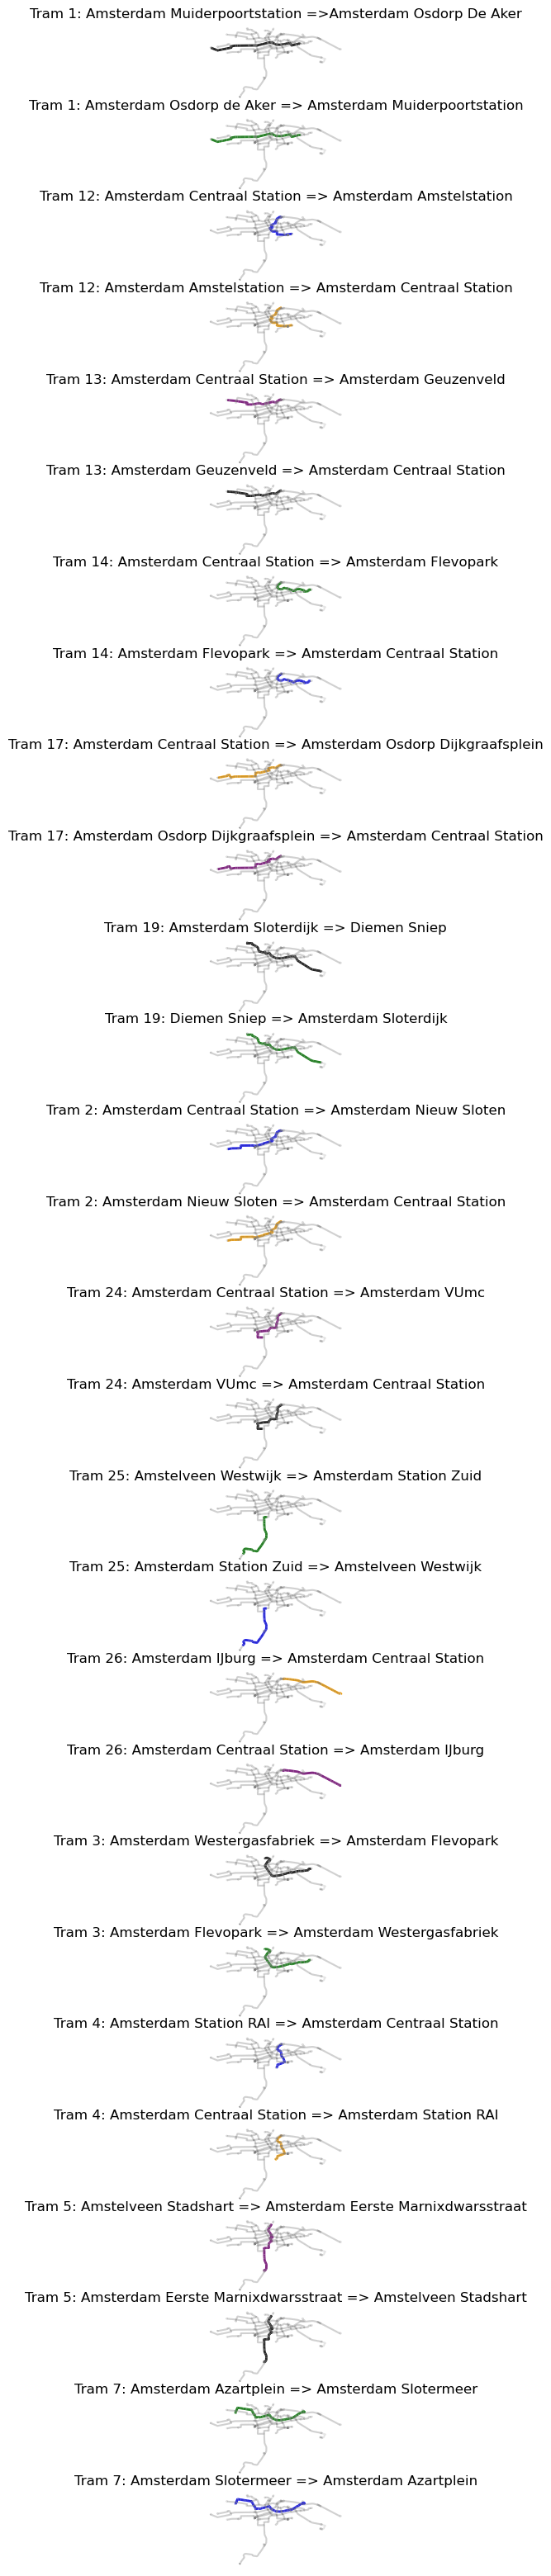

In [20]:
tram_order_route_dict, tram_shortest_path_pairs, tram_shortest_path_edges, tram_edges_dict = tram(tram_stations, tram_edges, tram_nodes, tram_routes, city='Amsterdam')

In [21]:
tram_shortest_path_edges

{'Tram 1: Amsterdam Muiderpoortstation =>Amsterdam Osdorp De Aker':        osm_id                                           geometry railway  \
 0   322841927  LINESTRING (4.7770976 52.352828, 4.7768625 52....    tram   
 1   322841927  LINESTRING (4.7836582 52.3501979, 4.7833776 52...    tram   
 2    26594761  LINESTRING (4.785218 52.3495798, 4.7849725 52....    tram   
 3   322841907  LINESTRING (4.7881565 52.3496994, 4.7880725 52...    tram   
 4   322841927  LINESTRING (4.7849725 52.3496771, 4.7836582 52...    tram   
 ..        ...                                                ...     ...   
 91  770438581  LINESTRING (4.9289422 52.3609314, 4.9288413 52...    tram   
 92    7045610  LINESTRING (4.9324018 52.3610615, 4.932387 52....    tram   
 93  770429442  LINESTRING (4.9326128 52.3607965, 4.9325204 52...    tram   
 94  770429442  LINESTRING (4.9325122 52.3609243, 4.9324018 52...    tram   
 95  770438581  LINESTRING (4.9321097 52.361227, 4.9305569 52....    tram   
 
    ser

In [22]:
tram_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(tram_order_route_dict, tram_routes)

In [23]:
aggregation_functions_nodes = {
    'name': 'first',
    'geometry': 'first',
    'geo_x': 'first',
    'geo_y': 'first',
    'route_name_list': lambda x: ', '.join(x),
    'ref': (lambda x: ', '.join(x)),
    'route': 'first'
}

In [24]:
tram_new_nodes = add_columns_to_nodes(tram_order_route_dict, aggregation_functions_nodes, tram_nodes)

In [25]:
tram_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(tram_shortest_path_edges, tram_routes)

In [26]:
tram_shortest_path_edges

{'Tram 1: Amsterdam Muiderpoortstation =>Amsterdam Osdorp De Aker':        osm_id                                           geometry railway  \
 0   322841927  LINESTRING (4.7770976 52.352828, 4.7768625 52....    tram   
 1   322841927  LINESTRING (4.7836582 52.3501979, 4.7833776 52...    tram   
 2    26594761  LINESTRING (4.785218 52.3495798, 4.7849725 52....    tram   
 3   322841907  LINESTRING (4.7881565 52.3496994, 4.7880725 52...    tram   
 4   322841927  LINESTRING (4.7849725 52.3496771, 4.7836582 52...    tram   
 ..        ...                                                ...     ...   
 91  770438581  LINESTRING (4.9289422 52.3609314, 4.9288413 52...    tram   
 92    7045610  LINESTRING (4.9324018 52.3610615, 4.932387 52....    tram   
 93  770429442  LINESTRING (4.9326128 52.3607965, 4.9325204 52...    tram   
 94  770429442  LINESTRING (4.9325122 52.3609243, 4.9324018 52...    tram   
 95  770438581  LINESTRING (4.9321097 52.361227, 4.9305569 52....    tram   
 
    ser

In [27]:
aggregation_functions_edges = {
    'geometry': 'first',
    'count_weight': 'first',
    'route_name_list': lambda x: ', '.join(x),
    'ref': lambda x: ', '.join(x),
    'route': 'first'
}

In [29]:
tram_new_edges = add_columns_to_edges(tram_shortest_path_edges, aggregation_functions_edges, tram_edges)

In [30]:
tram_new_edges

,osm_id,geometry,railway,service,id_x,from_id,to_id,distance,time,weights,to_from,from_to,id_y,count_weight,route_name_list,ref,route
0,7045610,"LINESTRING (4.9324018 52.3610615, 4.932387 52....",tram,None,0,0,1,28.561299,0.002040,28,"(0, 1)","(1, 0)",0.0,1.0,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,1,tram
1,7045616,"LINESTRING (4.934085 52.3609657, 4.9340765 52....",tram,None,1,2,3,146.082551,0.010434,146,"(2, 3)","(3, 2)",NaN,NaN,NaN,NaN,NaN
2,7045675,"LINESTRING (4.9337809 52.3611734, 4.9339017 52...",tram,None,2,4,5,390.987463,0.027928,390,"(4, 5)","(5, 4)",2.0,1.0,Tram 3: Amsterdam Westergasfabriek => Amsterda...,3,tram
3,7045689,"LINESTRING (4.9394 52.361617, 4.9385742 52.361...",tram,None,3,6,7,345.247175,0.024661,345,"(6, 7)","(7, 6)",3.0,1.0,Tram 3: Amsterdam Flevopark => Amsterdam Weste...,3,tram
4,7045994,"LINESTRING (4.9157261 52.365067, 4.9157046 52....",tram,None,4,8,1730,35.152166,0.002511,35,"(8, 1730)","(1730, 8)",4.0,1.0,Tram 14: Amsterdam Flevopark => Amsterdam Cent...,14,tram
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199,1185084715,"LINESTRING (4.8520736 52.3479443, 4.8521852 52...",tram,None,2199,1496,594,11.280287,0.000806,11,"(1496, 594)","(594, 1496)",NaN,NaN,NaN,NaN,NaN
2200,1185084716,"LINESTRING (4.852325 52.3480075, 4.852489 52.3...",tram,None,2200,562,1072,12.010525,0.000858,12,"(562, 1072)","(1072, 562)",NaN,NaN,NaN,NaN,NaN
2201,1185084717,"LINESTRING (4.8516012 52.3470208, 4.8519064 52...",tram,None,2201,1497,561,81.765515,0.005840,81,"(1497, 561)","(561, 1497)",NaN,NaN,NaN,NaN,NaN
2202,1185084718,"LINESTRING (4.8522982 52.348033, 4.8524709 52....",tram,None,2202,566,1079,12.587379,0.000899,12,"(566, 1079)","(1079, 566)",NaN,NaN,NaN,NaN,NaN


In [31]:
tram_path_s_e, tram_length_s_e, tram_short_path_edges_s_e,tram_start_end_points_coordinates_pairs,tram_start_end_nearest_id_pairs = transfer_shortest_path(s_e_coordinates, tram_new_edges, tram_new_nodes)

In [32]:
tram_distance_s_s_tuple, tram_distance_e_e_tuple = walking_linear_distance(tram_start_end_points_coordinates_pairs,tram_start_end_nearest_id_pairs,tram_new_nodes)

In [33]:
tram_distance_s_s_tuple

19.090650971368735

In [34]:
tram_distance_e_e_tuple

22.82448978646332

In [35]:
chosentram_using_time_tuple = transfer_using_time( tram_short_path_edges_s_e,tram_distance_s_s_tuple, tram_distance_e_e_tuple)

In [36]:
chosentram_using_time_tuple

(0.46891176504995274, 28, 0.46052873689838636, 0.008383028151566411)

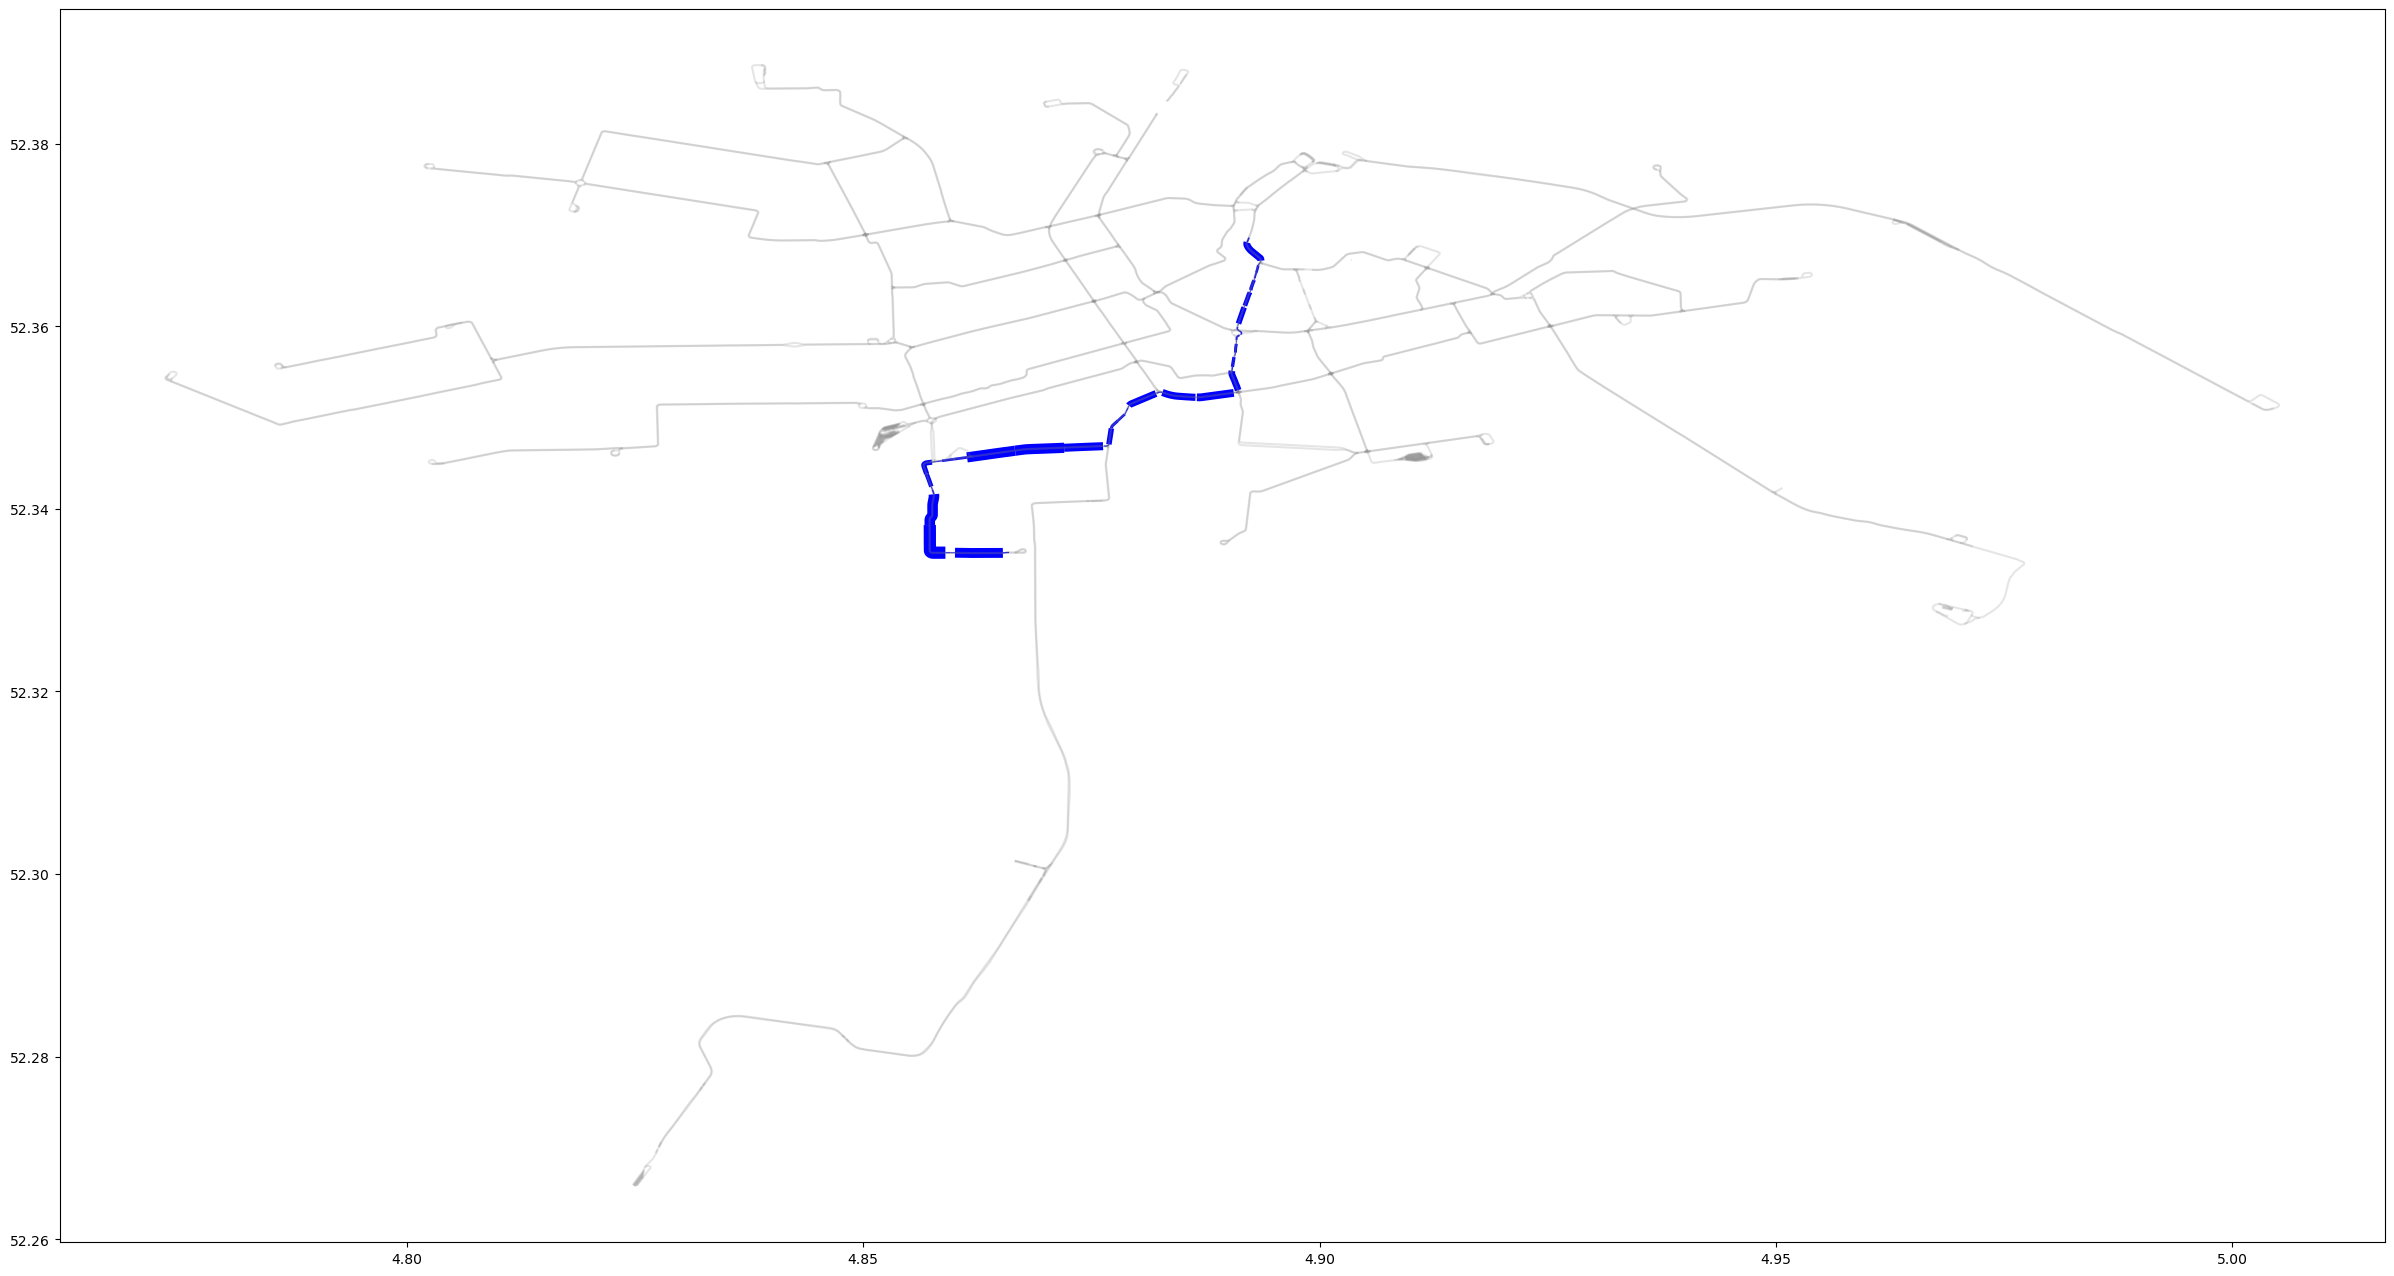

In [37]:
plot_chosen_single_transport(tram_new_edges,tram_short_path_edges_s_e)

# Subway

In [5]:
sub_stations, edges, nodes, sub_routes, check_name = prepare_metro(osm_path)

topology: 100%|████████████████████████████████████████████████████████████████████| 962/962 [00:00<00:00, 9121.16it/s]


In [6]:
replacement_dict = {
     'Amsterdam Centraal': 'Centraal Station',
}


sub_routes, check_name = recheck_metro_routes(replacement_dict, sub_stations, sub_routes)

In [7]:
sub_routes

,osm_id,route,to,name,ref,network,service,geometry
0,18683,subway,Isolatorweg,Metro 50: Gein => Isolatorweg,50,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.98996 52.29640, 4.98959 52..."
1,4515354,subway,Gein,Metro 50: Isolatorweg => Gein,50,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.83880 52.38842, 4.83897 52..."
2,31249,subway,Isolatorweg,Metro 51: Centraal Station => Isolatorweg,51,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.90193 52.37689, 4.90202 52..."
3,4515355,subway,Centraal Station,Metro 51: Isolatorweg => Centraal Station,51,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.83880 52.38842, 4.83897 52..."
4,8466667,subway,Zuid,Metro 52: Noord => Zuid,52,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.93265 52.40228, 4.93269 52..."
5,8466671,subway,Noord,Metro 52: Zuid => Noord,52,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.87423 52.33922, 4.87552 52..."
6,18532,subway,Gaasperplas,Metro 53: Centraal Station => Gaasperplas,53,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.90193 52.37689, 4.90202 52..."
7,4515356,subway,Centraal Station,Metro 53: Gaasperplas => Centraal Station,53,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.98373 52.31201, 4.98364 52..."
8,18423,subway,Gein,Metro 54: Centraal Station => Gein,54,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.90193 52.37689, 4.90202 52..."
9,4515357,subway,Centraal Station,Metro 54: Gein => Centraal Station,54,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.98996 52.29640, 4.98959 52..."


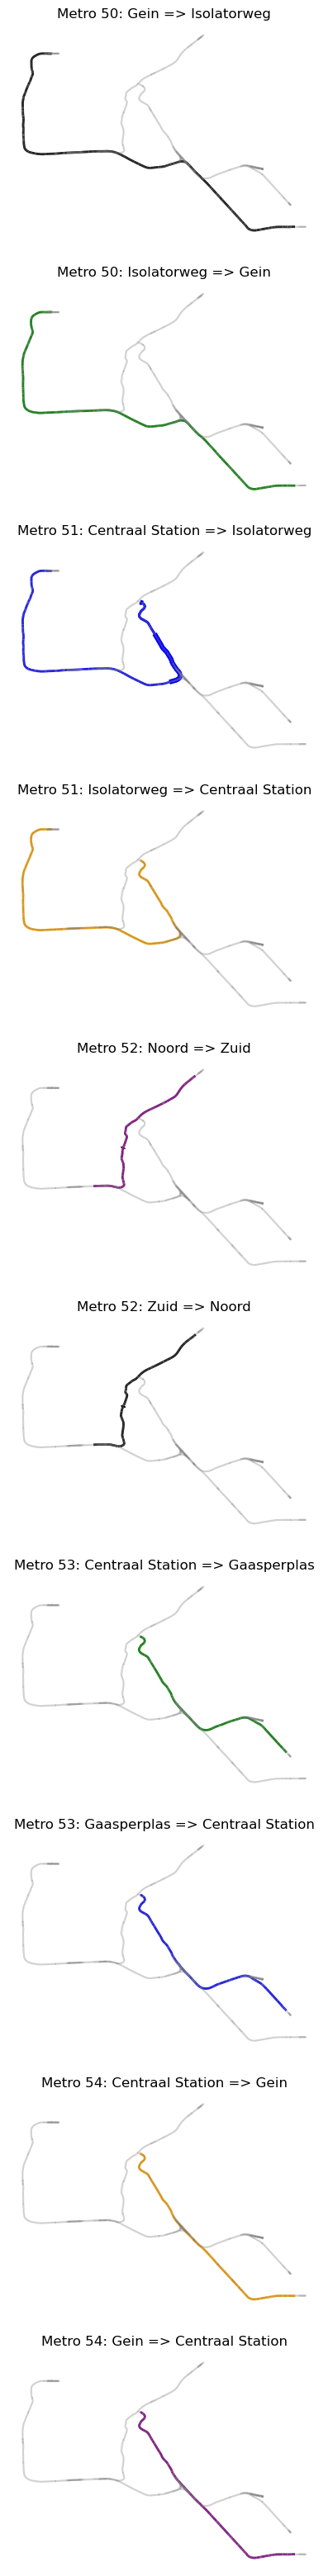

In [8]:
sub_order_route_dict, sub_shortest_path_pairs, sub_shortest_path_edges, sub_edges = metro(sub_stations, edges, nodes, sub_routes, city='Amsterdam')

In [9]:
sub_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(sub_order_route_dict, sub_routes)

In [10]:
aggregation_functions = {
    'name': 'first',
    'geometry': 'first',
    'geo_x': 'first',
    'geo_y': 'first',
    'route_name_list': lambda x: ', '.join(x),
    'ref': (lambda x: ', '.join(x)),
    'route': 'first'
}

In [11]:
sub_new_nodes = add_columns_to_nodes(sub_order_route_dict, aggregation_functions, nodes)

In [12]:
sub_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(sub_shortest_path_edges, sub_routes)

In [13]:
aggregation_functions = {
    'geometry': 'first',
    'count_weight': 'first',
    'route_name_list': lambda x: ', '.join(x),
    'ref': lambda x: ', '.join(x),
    'route': 'first'
}

In [14]:
sub_new_edges = add_columns_to_edges(sub_shortest_path_edges, aggregation_functions, edges)

In [15]:
sub_path_s_e, sub_length_s_e, sub_short_path_edges_s_e, sub_start_end_points_coordinates_pairs, sub_start_end_nearest_id_pairs = transfer_shortest_path(s_e_coordinates, sub_new_edges, sub_new_nodes)

NetworkXNoPath: No path between 96 and 745.

In [ ]:
sub_short_path_edges

In [ ]:
sub_distance_s_s_tuple, sub_distance_e_e_tuple = walking_linear_distance(sub_start_end_points_coordinates_pairs,sub_start_end_nearest_id_pairs, sub_new_nodes)

In [ ]:
sub_distance_s_s_tuple

In [ ]:
sub_distance_e_e_tuple

In [ ]:
choosesub_using_time_tuple = transfer_using_time(sub_short_path_edges_s_e, sub_distance_s_s_tuple, sub_distance_e_e_tuple)

In [ ]:
choosesub_using_time_tuple

In [23]:
choosesub_using_time_tuple[1]

1210